# 调整工作环境

In [387]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
#from sklearn.model_selection import train_test_split
#查看既有路径
os.getcwd()
os.chdir(r'F:\07kaggle\01housepricepre')
os.getcwd()

'F:\\07kaggle\\01housepricepre'

# 查看数据

In [437]:
df_train = pd.read_csv(r'data\train.csv')
df_test = pd.read_csv(r'data\test.csv')
pd.set_option('display.width', 700)#设置显示的宽度
#查看前5行数据
df_train.head()


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [438]:
#查看数据shape，81=79+2（一个是price，一个是序号）
print("train shape:{}".format(df_train.shape))
print("test shape:{}".format(df_test.shape))

train shape:(1460, 81)
test shape:(1459, 80)


了解数据类型

In [439]:
print(df_train.dtypes)#数据的类型
df_train.describe()#数据的各个基本情况（包括平均值、方差等等）

Id                 int64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
Street            object
Alley             object
LotShape          object
LandContour       object
Utilities         object
LotConfig         object
LandSlope         object
Neighborhood      object
Condition1        object
Condition2        object
BldgType          object
HouseStyle        object
OverallQual        int64
OverallCond        int64
YearBuilt          int64
YearRemodAdd       int64
RoofStyle         object
RoofMatl          object
Exterior1st       object
Exterior2nd       object
MasVnrType        object
MasVnrArea       float64
ExterQual         object
ExterCond         object
Foundation        object
                  ...   
BedroomAbvGr       int64
KitchenAbvGr       int64
KitchenQual       object
TotRmsAbvGrd       int64
Functional        object
Fireplaces         int64
FireplaceQu       object
GarageType        object
GarageYrBlt      float64


C:\Users\41667\Anaconda3\lib\site-packages\numpy\lib\function_base.py:4269: RuntimeWarning: Invalid value encountered in percentile
  interpolation=interpolation)


,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,NaN,7553.500000,5.000000,5.000000,1954.000000,1967.000000,NaN,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,NaN,9478.500000,6.000000,5.000000,1973.000000,1994.000000,NaN,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,NaN,11601.500000,7.000000,6.000000,2000.000000,2004.000000,NaN,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


查看price的直方图

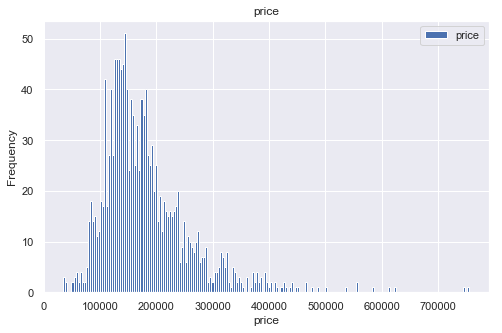

In [440]:
plt.figure(figsize = (8,5))
plt.hist(df_train['SalePrice'],bins=200,label = ['price'])#直方图主属性，data，直方图个数
plt.grid(True)
plt.legend(loc = 0)#位置
plt.xlabel('price')
plt.ylabel('Frequency')
plt.title('price')
plt.show()

用散点矩阵图，查看各个参数与房价的关系

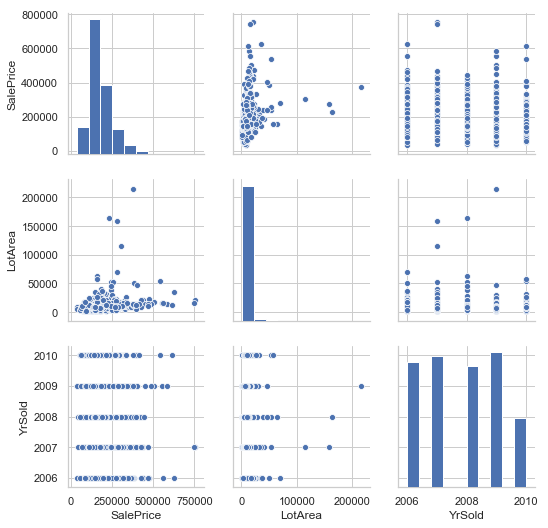

In [441]:
sns.set(style = 'whitegrid', context = 'notebook')
cols = ['PoolQC','SalePrice','LotArea','Fence','YrSold']
#这里一部分数据即使为int or float也无法实现，是因为存在空的数据
sns.pairplot(df_train[cols], height = 2.5)
plt.show()

# 数据清洗

移除ID便于处理数据

In [442]:
df_train.drop('Id',inplace = True, axis = 1)#1=行，0=列，这里是指每一行的单个元素
df_test.drop('Id',inplace = True, axis = 1)
#查看一下删除后的情况
#df_test.head()
#合并两组成full，便于处理数据



In [443]:
df_full = pd.concat([df_train,df_test],axis = 0)

查看数据丢失率

In [444]:
#查看完整数据缺失值的数量
#先去除saleprice数据，只留下影响因素（自变量）
df_full_ = df_full.drop(['SalePrice'],axis = 1)
lack = df_full_.isnull().sum()#full_nun的集合
lack_ = lack[lack>0].sort_values(ascending = False)#降序排序

lack_data_count = lack_.to_frame(name='Nun_count')#series转dataframe
lack_index = lack_data_count.index
cha_alltime = df_full[lack_index]
lack_data_count['all_count'] = len(df_full)
lack_data_count['lack_per%'] = lack_data_count['Nun_count'] / lack_data_count['all_count']*100
lack_data_count

,Nun_count,all_count,lack_per%
PoolQC,2909,2919,99.657417
MiscFeature,2814,2919,96.402878
Alley,2721,2919,93.216855
Fence,2348,2919,80.438506
FireplaceQu,1420,2919,48.646797
LotFrontage,486,2919,16.649538
GarageQual,159,2919,5.447071
GarageCond,159,2919,5.447071
GarageFinish,159,2919,5.447071
GarageYrBlt,159,2919,5.447071


根据上面对数据的观察，对缺失数据进行分别处理

In [445]:
#删除数据特征 "PoolQC",'MiscFeature','Alley'
cols1= [
    "PoolQC",'MiscFeature','Alley','Fence'
        ]
df_full_.drop(cols1, axis = 1, inplace =True)

In [446]:
#替换缺失数据为none,
cols2 = [
    "FireplaceQu", "GarageCond", "GarageFinish", 'GarageQual',
    "GarageType", "BsmtExposure", "BsmtCond", "BsmtQual",'Exterior2nd', 
    "BsmtFinType2", "BsmtFinType1","MasVnrType",'BsmtCond','BsmtExposure','Exterior1st',
    'Utilities'
        ]
for col in cols2:
    df_full_[col].fillna('None', inplace = True)

#替换缺失数据为‘0’
cols3=["MasVnrArea", 'BsmtFullBath','BsmtHalfBath',
       "BsmtUnfSF", "TotalBsmtSF", "GarageCars",
      "BsmtFinSF2", "BsmtFinSF1", "GarageArea",
       'GarageYrBlt','BsmtFinSF1','BsmtFinSF2','TotalBsmtSF',
       'BsmtFullBath','BsmtHalfBath','BsmtUnfSF','MasVnrArea'
      ]
for col in cols3:
    df_full_[col].fillna(0,inplace = True)

#特别插补_众数
most_common = df_full_['Electrical'].value_counts().index[0]#没有直接求众数的，于是曲线救国
df_full_['Electrical'].fillna(most_common,inplace =True)
most_commom2 = df_full['SaleType'].value_counts().index[0]
df_full_['SaleType'].fillna(most_commom2,inplace = True)   
most_commom2 = df_full['MSZoning'].value_counts().index[0]
df_full_['MSZoning'].fillna(most_commom2,inplace = True)   
#特别插补_
df_full_['Functional'].fillna('Typ',inplace = True)
df_full_['KitchenQual'].fillna('TA',inplace = True)
#相关特征的均值插补
    #1
grp = df_full_.groupby('Neighborhood')['GarageArea'].mean()
nan_idx = df_full_[df_full_['GarageArea'].isnull() == True].index.tolist()#获得lotfrontage缺失的样本的序号
for idx in nan_idx:
    df_full_.loc[idx,'GarageArea'] = int(round(grp.loc[df_full_.iloc[idx]['Neighborhood']]))
    #2
grp = df_full_.groupby('Neighborhood')['GarageCars'].mean()
nan_idx = df_full_[df_full_['GarageCars'].isnull() == True].index.tolist()#获得lotfrontage缺失的样本的序号
for idx in nan_idx:
    df_full_.loc[idx,'GarageCars'] = int(round(grp.loc[df_full_.iloc[idx]['Neighborhood']]))
    #3
grp = df_full_.groupby('Neighborhood')['LotFrontage'].mean()
nan_idx = df_full_[df_full_['LotFrontage'].isnull() == True].index.tolist()#获得lotfrontage缺失的样本的序号
for idx in nan_idx:
    df_full_.loc[idx,'LotFrontage'] = int(round(grp.loc[df_full_.iloc[idx]['Neighborhood']]))


In [447]:
#检测处理后缺值得结果
lack = df_full_.isnull().sum()
lack[lack>0]

Series([], dtype: int64)

# 特征工程

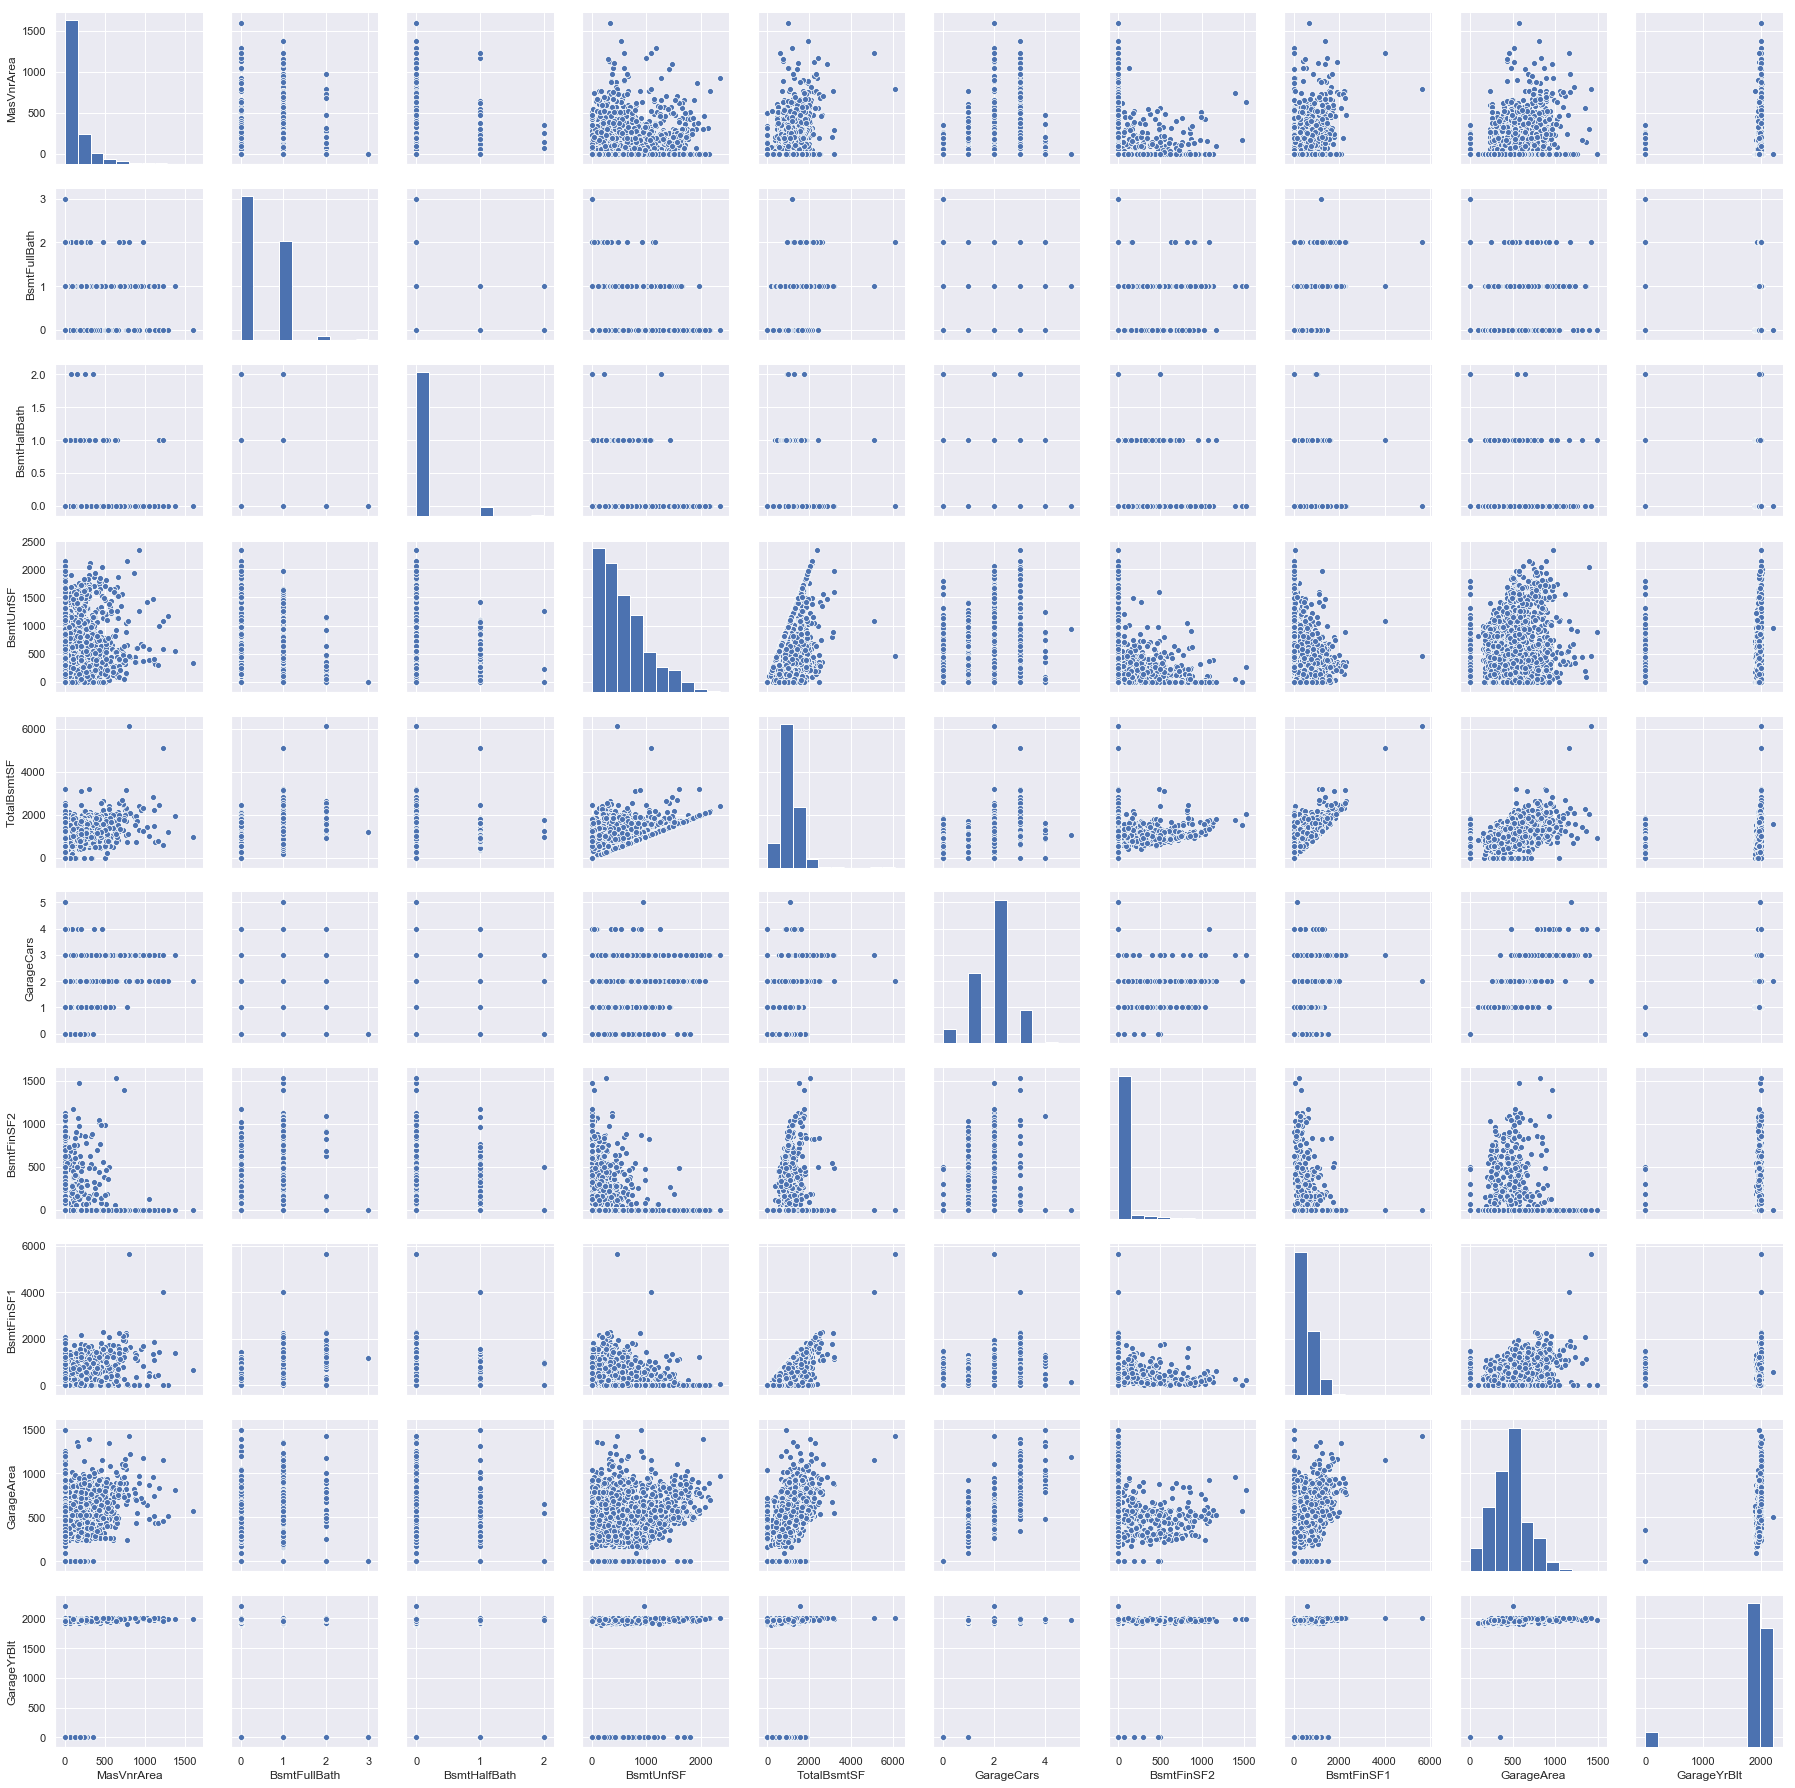

In [448]:
#散点图观察
col =["MasVnrArea", 'BsmtFullBath','BsmtHalfBath',
             "BsmtUnfSF", "TotalBsmtSF", "GarageCars",
            "BsmtFinSF2", "BsmtFinSF1", "GarageArea",
       'GarageYrBlt'
    ]
sns.set()
sns.pairplot(df_full_[col],height = 2.5)
plt.show()

为了量化特征之间得关系，创建相关系数矩阵得方阵，衡量两两特征间的线性依赖关系。

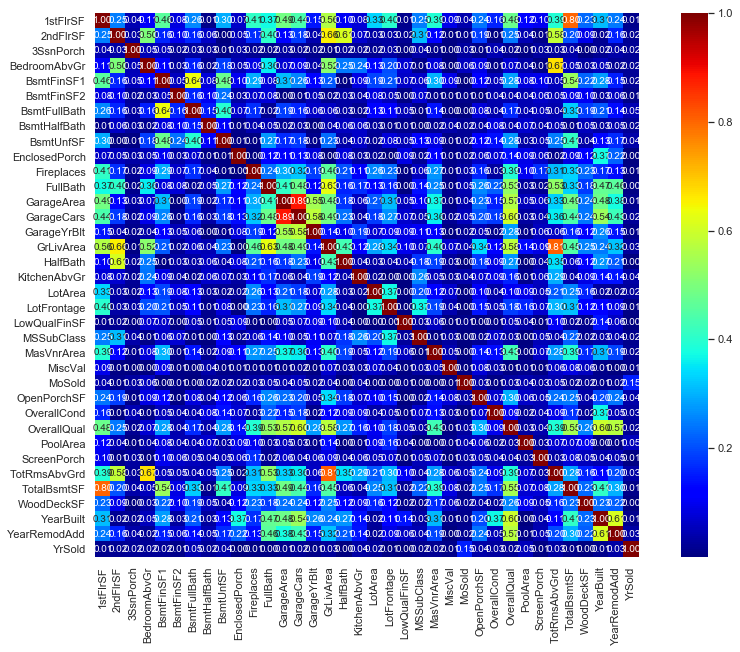

In [449]:
#.abs()返回绝对值
corr_matrix = df_full_.corr(method='pearson').abs()
plt.subplots(figsize = (15,10))
sns.heatmap(corr_matrix, cmap = 'jet',cbar =True,annot = True,annot_kws = {'size':10},fmt = '.2f',square = True)
plt.show()

发现totalbsmtsf（地下室面积）与1stflrsf（一层面积）有很大的正相关

查看到train的特征，特别是看一下price的联系

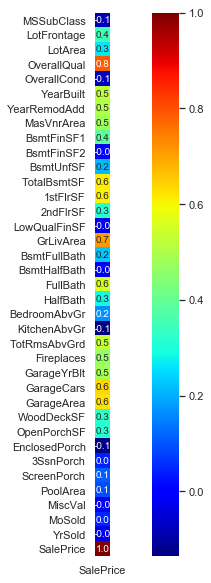

In [450]:
corr_matrix1 = df_train.corr()[['SalePrice']]
plt.subplots(figsize = (15,10))
sns.heatmap(corr_matrix1, cmap = 'jet',cbar =True,annot = True,annot_kws = {'size':10},fmt = '.1f',square = True)
plt.show()

如上图所示，（各种）面积、总体品质与价格的正相关性很高，封闭式玄关面积呈现轻微的负相关（这是什么鬼？）

看一下具体的特征，来剔除掉一些多余的参数

In [451]:
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k =1).astype(np.bool))
to_drop = [column for column in upper.columns if any(upper[column] >= 0.75)]

In [452]:
#与教程数据不同，不过检查后发现应该没什么问题，还是相信自己的数据
to_drop

['GarageCars', 'TotRmsAbvGrd', 'TotalBsmtSF']

In [453]:
df_full_.drop(to_drop, axis =1, inplace= True)

In [454]:
#检测处理后缺值得结果
lack = df_full_.isnull().sum()
lack[lack>0]

Series([], dtype: int64)

In [455]:
df_full_

,1stFlrSF,2ndFlrSF,3SsnPorch,BedroomAbvGr,BldgType,BsmtCond,BsmtExposure,BsmtFinSF1,BsmtFinSF2,BsmtFinType1,...,RoofStyle,SaleCondition,SaleType,ScreenPorch,Street,Utilities,WoodDeckSF,YearBuilt,YearRemodAdd,YrSold
0,856,854,0,3,1Fam,TA,No,706.0,0.0,GLQ,...,Gable,Normal,WD,0,Pave,AllPub,0,2003,2003,2008
1,1262,0,0,3,1Fam,TA,Gd,978.0,0.0,ALQ,...,Gable,Normal,WD,0,Pave,AllPub,298,1976,1976,2007
2,920,866,0,3,1Fam,TA,Mn,486.0,0.0,GLQ,...,Gable,Normal,WD,0,Pave,AllPub,0,2001,2002,2008
3,961,756,0,3,1Fam,Gd,No,216.0,0.0,ALQ,...,Gable,Abnorml,WD,0,Pave,AllPub,0,1915,1970,2006
4,1145,1053,0,4,1Fam,TA,Av,655.0,0.0,GLQ,...,Gable,Normal,WD,0,Pave,AllPub,192,2000,2000,2008
5,796,566,320,1,1Fam,TA,No,732.0,0.0,GLQ,...,Gable,Normal,WD,0,Pave,AllPub,40,1993,1995,2009
6,1694,0,0,3,1Fam,TA,Av,1369.0,0.0,GLQ,...,Gable,Normal,WD,0,Pave,AllPub,255,2004,2005,2007
7,1107,983,0,3,1Fam,TA,Mn,859.0,32.0,ALQ,...,Gable,Normal,WD,0,Pave,AllPub,235,1973,1973,2009
8,1022,752,0,2,1Fam,TA,No,0.0,0.0,Unf,...,Gable,Abnorml,WD,0,Pave,AllPub,90,1931,1950,2008
9,1077,0,0,2,2fmCon,TA,No,851.0,0.0,GLQ,...,Gable,Normal,WD,0,Pave,AllPub,0,1939,1950,2008


异常值处理

筛选掉一些离群点

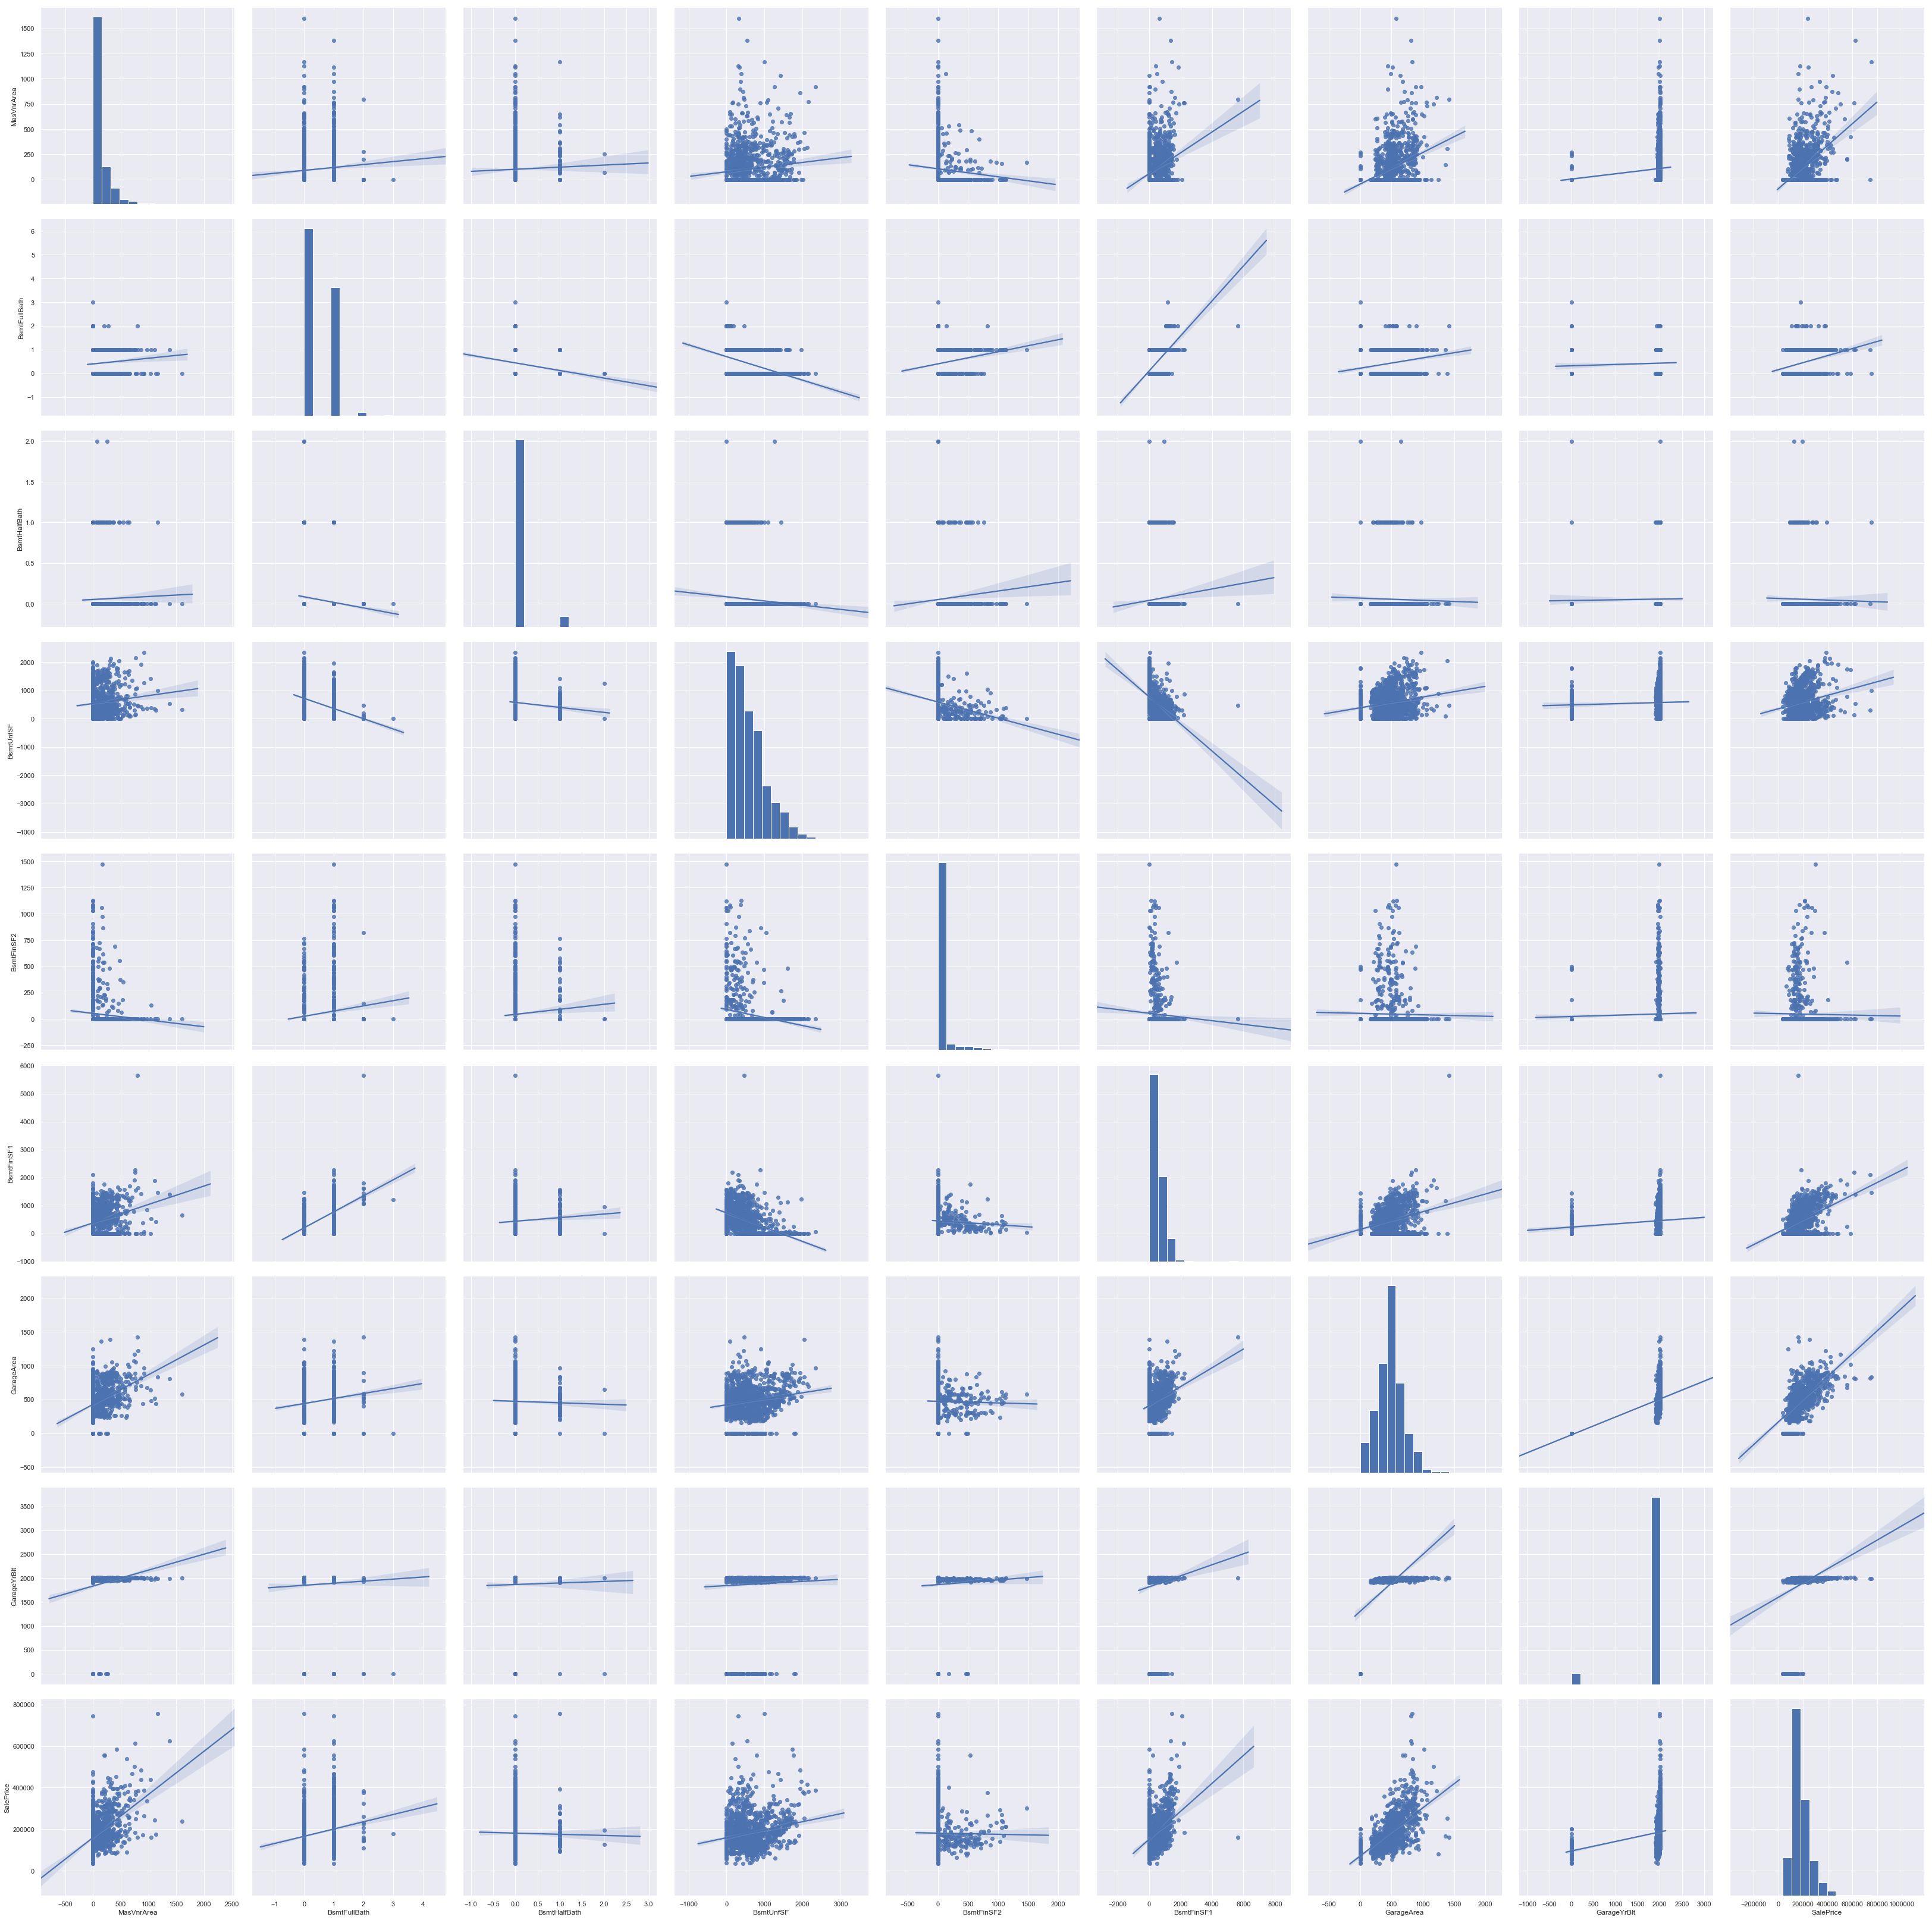

In [456]:

#为训练集添加saleprice参数，便于观察
y_train = df_train['SalePrice']
df_train_ = df_full_.iloc[:len(df_train)]
#这里定义df_train_为无price、去除了上述异常的训练数据集
df_train_add_price = pd.concat([df_train_,y_train], axis =1)
col = ["MasVnrArea", 'BsmtFullBath','BsmtHalfBath',
             "BsmtUnfSF",
            "BsmtFinSF2", "BsmtFinSF1", "GarageArea",
       'GarageYrBlt','SalePrice']
#for i in col:
sns.pairplot(df_train_add_price,vars = col, height = 5,kind="reg")
plt.show()


看得出来，有一些值还蛮奇怪的，不过这里只是走个kaggle比赛的流程，就不深究了

这里按照教程观察一下grlivarea,会发现它出现了两个比较明显的离散值，即面积那么大，房价反而很低，不过我觉得这个也能理解吧，但在这里还是把这些异常值除去好了

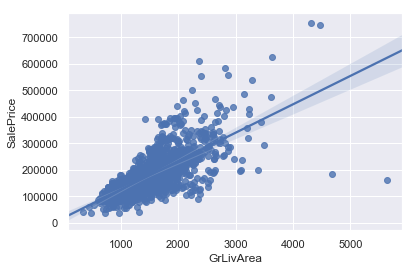

In [457]:
sns.regplot(x = df_train_add_price['GrLivArea'],y = y_train)
plt.show()

In [458]:
#检查空缺值 
lack = df_train_.isnull().sum()
lack[lack>0]

Series([], dtype: int64)

In [459]:
#重新排序
df_full_.reset_index(drop=True, inplace=True)
#按照Grlivarea的倒数两位，进行选择（by=列/行，ascending=false为降序
drop_points = df_train_.sort_values(by = 'GrLivArea', ascending = False)[:2]['GrLivArea']
#提取list的序号，进行排序
drop_points_list = drop_points.index.tolist()
df_full_.drop(drop_points_list, inplace =True)

In [460]:
#这里把特征集处理后，还需要把y-train，即价格的那几行也删除掉
y_train_ = y_train.drop(drop_points_list)
#被删除后，序列改变了，则展开重新排序
y_train_.reset_index(drop=True, inplace=True)
df_train_last_index = df_train.shape[0] - len(drop_points_list)

In [461]:
df_full_

,1stFlrSF,2ndFlrSF,3SsnPorch,BedroomAbvGr,BldgType,BsmtCond,BsmtExposure,BsmtFinSF1,BsmtFinSF2,BsmtFinType1,...,RoofStyle,SaleCondition,SaleType,ScreenPorch,Street,Utilities,WoodDeckSF,YearBuilt,YearRemodAdd,YrSold
0,856,854,0,3,1Fam,TA,No,706.0,0.0,GLQ,...,Gable,Normal,WD,0,Pave,AllPub,0,2003,2003,2008
1,1262,0,0,3,1Fam,TA,Gd,978.0,0.0,ALQ,...,Gable,Normal,WD,0,Pave,AllPub,298,1976,1976,2007
2,920,866,0,3,1Fam,TA,Mn,486.0,0.0,GLQ,...,Gable,Normal,WD,0,Pave,AllPub,0,2001,2002,2008
3,961,756,0,3,1Fam,Gd,No,216.0,0.0,ALQ,...,Gable,Abnorml,WD,0,Pave,AllPub,0,1915,1970,2006
4,1145,1053,0,4,1Fam,TA,Av,655.0,0.0,GLQ,...,Gable,Normal,WD,0,Pave,AllPub,192,2000,2000,2008
5,796,566,320,1,1Fam,TA,No,732.0,0.0,GLQ,...,Gable,Normal,WD,0,Pave,AllPub,40,1993,1995,2009
6,1694,0,0,3,1Fam,TA,Av,1369.0,0.0,GLQ,...,Gable,Normal,WD,0,Pave,AllPub,255,2004,2005,2007
7,1107,983,0,3,1Fam,TA,Mn,859.0,32.0,ALQ,...,Gable,Normal,WD,0,Pave,AllPub,235,1973,1973,2009
8,1022,752,0,2,1Fam,TA,No,0.0,0.0,Unf,...,Gable,Abnorml,WD,0,Pave,AllPub,90,1931,1950,2008
9,1077,0,0,2,2fmCon,TA,No,851.0,0.0,GLQ,...,Gable,Normal,WD,0,Pave,AllPub,0,1939,1950,2008


特征转换：

某些特征值列为int（20，40，60，80），但实际上它代表着其他意思，并非是int，而是Category

In [462]:
df_full_['MSSubClass'] = df_full_['MSSubClass'].astype(str)
#查看了修正后的type
#type(df_full_['MSSubClass'][0].values[0])

这里引入“绝对偏态”的概念。

认为，绝对偏态值 >thresh 被认为是倾斜严重,为了减少倾斜异常值的影响,更好的处理它们，对它们作log处理，代码就是apply(ny.log1p)也就是作log(1+x)处理，可以让data平滑化

偏态值用于衡量成绩分布服从正态分布的程度。其计算公式为3*（平均成绩 - 中位数）/标准差。一般来说偏态值在－ 1到+1 的范围之内就可以认为成绩基本呈正态分布。 中位数是这样一个分数：成绩高于中位数的人数和成绩低于中位数的人数各占50%。

In [463]:
skew_thresh =0.5
skewed = df_full_.skew().sort_values(ascending = False)
a = skewed[abs(skewed)>skew_thresh]
skewed_cols = skewed[abs(skewed)>skew_thresh].index.tolist()
df_full_[skewed_cols] = df_full_[skewed_cols].apply(np.log1p)#这一步就完成了数据平滑
df_full_[skewed_cols].head()

,MiscVal,PoolArea,LotArea,LowQualFinSF,3SsnPorch,KitchenAbvGr,BsmtFinSF2,EnclosedPorch,ScreenPorch,BsmtHalfBath,...,LotFrontage,BsmtFinSF1,BsmtUnfSF,2ndFlrSF,Fireplaces,HalfBath,BsmtFullBath,OverallCond,YearBuilt,GarageYrBlt
0,0.0,0.0,9.042040,0.0,0.0,0.693147,0.0,0.000000,0.0,0.000000,...,4.189655,6.561031,5.017280,6.751101,0.000000,0.693147,0.693147,1.791759,7.602900,7.602900
1,0.0,0.0,9.169623,0.0,0.0,0.693147,0.0,0.000000,0.0,0.693147,...,4.394449,6.886532,5.652489,0.000000,0.693147,0.000000,0.000000,2.197225,7.589336,7.589336
2,0.0,0.0,9.328212,0.0,0.0,0.693147,0.0,0.000000,0.0,0.000000,...,4.234107,6.188264,6.075346,6.765039,0.693147,0.693147,0.693147,1.791759,7.601902,7.601902
3,0.0,0.0,9.164401,0.0,0.0,0.693147,0.0,5.609472,0.0,0.000000,...,4.110874,5.379897,6.293419,6.629363,0.693147,0.000000,0.693147,1.791759,7.557995,7.600402
4,0.0,0.0,9.565284,0.0,0.0,0.693147,0.0,0.000000,0.0,0.000000,...,4.442651,6.486161,6.196444,6.960348,0.693147,0.693147,0.693147,1.791759,7.601402,7.601402


In [464]:
df_full_

,1stFlrSF,2ndFlrSF,3SsnPorch,BedroomAbvGr,BldgType,BsmtCond,BsmtExposure,BsmtFinSF1,BsmtFinSF2,BsmtFinType1,...,RoofStyle,SaleCondition,SaleType,ScreenPorch,Street,Utilities,WoodDeckSF,YearBuilt,YearRemodAdd,YrSold
0,6.753438,6.751101,0.000000,3,1Fam,TA,No,6.561031,0.000000,GLQ,...,Gable,Normal,WD,0.000000,Pave,AllPub,0.000000,7.602900,2003,2008
1,7.141245,0.000000,0.000000,3,1Fam,TA,Gd,6.886532,0.000000,ALQ,...,Gable,Normal,WD,0.000000,Pave,AllPub,5.700444,7.589336,1976,2007
2,6.825460,6.765039,0.000000,3,1Fam,TA,Mn,6.188264,0.000000,GLQ,...,Gable,Normal,WD,0.000000,Pave,AllPub,0.000000,7.601902,2002,2008
3,6.869014,6.629363,0.000000,3,1Fam,Gd,No,5.379897,0.000000,ALQ,...,Gable,Abnorml,WD,0.000000,Pave,AllPub,0.000000,7.557995,1970,2006
4,7.044033,6.960348,0.000000,4,1Fam,TA,Av,6.486161,0.000000,GLQ,...,Gable,Normal,WD,0.000000,Pave,AllPub,5.262690,7.601402,2000,2008
5,6.680855,6.340359,5.771441,1,1Fam,TA,No,6.597146,0.000000,GLQ,...,Gable,Normal,WD,0.000000,Pave,AllPub,3.713572,7.597898,1995,2009
6,7.435438,0.000000,0.000000,3,1Fam,TA,Av,7.222566,0.000000,GLQ,...,Gable,Normal,WD,0.000000,Pave,AllPub,5.545177,7.603399,2005,2007
7,7.010312,6.891626,0.000000,3,1Fam,TA,Mn,6.756932,3.496508,ALQ,...,Gable,Normal,WD,0.000000,Pave,AllPub,5.463832,7.587817,1973,2009
8,6.930495,6.624065,0.000000,2,1Fam,TA,No,0.000000,0.000000,Unf,...,Gable,Abnorml,WD,0.000000,Pave,AllPub,4.510860,7.566311,1950,2008
9,6.982863,0.000000,0.000000,2,2fmCon,TA,No,6.747587,0.000000,GLQ,...,Gable,Normal,WD,0.000000,Pave,AllPub,0.000000,7.570443,1950,2008


这里使用pandas自带的get_dummies方法，一键One-Hot，用One-Hot的方法来表达Category

In [465]:
categorical_data_cols = df_full_.select_dtypes(include = ['object'])
print(categorical_data_cols.columns.tolist())
df_full_ = pd.get_dummies(df_full_)

['BldgType', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'BsmtQual', 'CentralAir', 'Condition1', 'Condition2', 'Electrical', 'ExterCond', 'ExterQual', 'Exterior1st', 'Exterior2nd', 'FireplaceQu', 'Foundation', 'Functional', 'GarageCond', 'GarageFinish', 'GarageQual', 'GarageType', 'Heating', 'HeatingQC', 'HouseStyle', 'KitchenQual', 'LandContour', 'LandSlope', 'LotConfig', 'LotShape', 'MSSubClass', 'MSZoning', 'MasVnrType', 'Neighborhood', 'PavedDrive', 'RoofMatl', 'RoofStyle', 'SaleCondition', 'SaleType', 'Street', 'Utilities']


In [466]:
df_full_

,1stFlrSF,2ndFlrSF,3SsnPorch,BedroomAbvGr,BsmtFinSF1,BsmtFinSF2,BsmtFullBath,BsmtHalfBath,BsmtUnfSF,EnclosedPorch,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,Street_Grvl,Street_Pave,Utilities_AllPub,Utilities_NoSeWa,Utilities_None
0,6.753438,6.751101,0.000000,3,6.561031,0.000000,0.693147,0.000000,5.017280,0.000000,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0
1,7.141245,0.000000,0.000000,3,6.886532,0.000000,0.000000,0.693147,5.652489,0.000000,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0
2,6.825460,6.765039,0.000000,3,6.188264,0.000000,0.693147,0.000000,6.075346,0.000000,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0
3,6.869014,6.629363,0.000000,3,5.379897,0.000000,0.693147,0.000000,6.293419,5.609472,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0
4,7.044033,6.960348,0.000000,4,6.486161,0.000000,0.693147,0.000000,6.196444,0.000000,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0
5,6.680855,6.340359,5.771441,1,6.597146,0.000000,0.693147,0.000000,4.174387,0.000000,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0
6,7.435438,0.000000,0.000000,3,7.222566,0.000000,0.693147,0.000000,5.762051,0.000000,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0
7,7.010312,6.891626,0.000000,3,6.756932,3.496508,0.693147,0.000000,5.379897,5.433722,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0
8,6.930495,6.624065,0.000000,2,0.000000,0.000000,0.000000,0.000000,6.859615,5.327876,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0
9,6.982863,0.000000,0.000000,2,6.747587,0.000000,0.693147,0.000000,4.948760,0.000000,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0


In [467]:
#检查空缺值 
lack = df_full_.isnull().sum()
lack[lack>0]

Series([], dtype: int64)

这里对price做了一个log，对各项参数数据做了一个标准化

In [468]:
y_train_ = np.log1p(y_train_)
#这里有一个疑惑，能否直接用sklearn的参数来完成标准化，而不是这样手动。
#不过没关系，我们先看一下网络教程的，再自己重新实践一次。
#发现还是用sk自带的的，可以完成。
from sklearn.preprocessing import StandardScaler
stdsc = StandardScaler()
df_full_std = stdsc.fit_transform(df_full_)
df_full_std = pd.DataFrame(df_full_std)

In [469]:
df_full_std

,0,1,2,3,4,5,6,7,8,9,...,289,290,291,292,293,294,295,296,297,298
0,-0.778480,1.198058,-0.112813,0.169987,0.784689,-0.362706,1.137924,-0.251636,-0.324876,-0.427719,...,-0.055632,-0.052441,-0.297377,-0.049046,0.393434,-0.064271,0.064271,0.032086,-0.018519,-0.026194
1,0.429642,-0.862925,-0.112813,0.169987,0.893899,-0.362706,-0.833925,3.887436,0.014894,-0.427719,...,-0.055632,-0.052441,-0.297377,-0.049046,0.393434,-0.064271,0.064271,0.032086,-0.018519,-0.026194
2,-0.554112,1.202313,-0.112813,0.169987,0.659622,-0.362706,1.137924,-0.251636,0.241078,-0.427719,...,-0.055632,-0.052441,-0.297377,-0.049046,0.393434,-0.064271,0.064271,0.032086,-0.018519,-0.026194
3,-0.418429,1.160894,-0.112813,0.169987,0.388406,-0.362706,1.137924,-0.251636,0.357724,2.737742,...,-0.055632,-0.052441,-0.297377,-0.049046,0.393434,-0.064271,0.064271,0.032086,-0.018519,-0.026194
4,0.126800,1.261937,-0.112813,1.385311,0.759570,-0.362706,1.137924,-0.251636,0.305852,-0.427719,...,-0.055632,-0.052441,-0.297377,-0.049046,0.393434,-0.064271,0.064271,0.032086,-0.018519,-0.026194
5,-1.004596,1.072666,9.716151,-2.260661,0.796806,-0.362706,1.137924,-0.251636,-0.775734,-0.427719,...,-0.055632,-0.052441,-0.297377,-0.049046,0.393434,-0.064271,0.064271,0.032086,-0.018519,-0.026194
6,1.346130,-0.862925,-0.112813,0.169987,1.006642,-0.362706,1.137924,-0.251636,0.073498,-0.427719,...,-0.055632,-0.052441,-0.297377,-0.049046,0.393434,-0.064271,0.064271,0.032086,-0.018519,-0.026194
7,0.021750,1.240957,-0.112813,0.169987,0.850417,1.498358,1.137924,-0.251636,-0.130914,2.638565,...,-0.055632,-0.052441,-0.297377,-0.049046,0.393434,-0.064271,0.064271,0.032086,-0.018519,-0.026194
8,-0.226901,1.159276,-0.112813,-1.045337,-1.416610,-0.362706,-0.833925,-0.251636,0.660578,2.578836,...,-0.055632,-0.052441,-0.297377,-0.049046,0.393434,-0.064271,0.064271,0.032086,-0.018519,-0.026194
9,-0.063761,-0.862925,-0.112813,-1.045337,0.847281,-0.362706,1.137924,-0.251636,-0.361526,-0.427719,...,-0.055632,-0.052441,-0.297377,-0.049046,0.393434,-0.064271,0.064271,0.032086,-0.018519,-0.026194


In [470]:
#检查空缺值 
lack = df_full_.isnull().sum()
lack[lack>0]

Series([], dtype: int64)

做成训练集与测试集合

In [471]:
df_tr = df_full_std.iloc[:df_train_last_index]
df_te = df_full_std.iloc[df_train_last_index:]

In [472]:
df_tr

,0,1,2,3,4,5,6,7,8,9,...,289,290,291,292,293,294,295,296,297,298
0,-0.778480,1.198058,-0.112813,0.169987,0.784689,-0.362706,1.137924,-0.251636,-0.324876,-0.427719,...,-0.055632,-0.052441,-0.297377,-0.049046,0.393434,-0.064271,0.064271,0.032086,-0.018519,-0.026194
1,0.429642,-0.862925,-0.112813,0.169987,0.893899,-0.362706,-0.833925,3.887436,0.014894,-0.427719,...,-0.055632,-0.052441,-0.297377,-0.049046,0.393434,-0.064271,0.064271,0.032086,-0.018519,-0.026194
2,-0.554112,1.202313,-0.112813,0.169987,0.659622,-0.362706,1.137924,-0.251636,0.241078,-0.427719,...,-0.055632,-0.052441,-0.297377,-0.049046,0.393434,-0.064271,0.064271,0.032086,-0.018519,-0.026194
3,-0.418429,1.160894,-0.112813,0.169987,0.388406,-0.362706,1.137924,-0.251636,0.357724,2.737742,...,-0.055632,-0.052441,-0.297377,-0.049046,0.393434,-0.064271,0.064271,0.032086,-0.018519,-0.026194
4,0.126800,1.261937,-0.112813,1.385311,0.759570,-0.362706,1.137924,-0.251636,0.305852,-0.427719,...,-0.055632,-0.052441,-0.297377,-0.049046,0.393434,-0.064271,0.064271,0.032086,-0.018519,-0.026194
5,-1.004596,1.072666,9.716151,-2.260661,0.796806,-0.362706,1.137924,-0.251636,-0.775734,-0.427719,...,-0.055632,-0.052441,-0.297377,-0.049046,0.393434,-0.064271,0.064271,0.032086,-0.018519,-0.026194
6,1.346130,-0.862925,-0.112813,0.169987,1.006642,-0.362706,1.137924,-0.251636,0.073498,-0.427719,...,-0.055632,-0.052441,-0.297377,-0.049046,0.393434,-0.064271,0.064271,0.032086,-0.018519,-0.026194
7,0.021750,1.240957,-0.112813,0.169987,0.850417,1.498358,1.137924,-0.251636,-0.130914,2.638565,...,-0.055632,-0.052441,-0.297377,-0.049046,0.393434,-0.064271,0.064271,0.032086,-0.018519,-0.026194
8,-0.226901,1.159276,-0.112813,-1.045337,-1.416610,-0.362706,-0.833925,-0.251636,0.660578,2.578836,...,-0.055632,-0.052441,-0.297377,-0.049046,0.393434,-0.064271,0.064271,0.032086,-0.018519,-0.026194
9,-0.063761,-0.862925,-0.112813,-1.045337,0.847281,-0.362706,1.137924,-0.251636,-0.361526,-0.427719,...,-0.055632,-0.052441,-0.297377,-0.049046,0.393434,-0.064271,0.064271,0.032086,-0.018519,-0.026194


In [473]:
len(df_tr) +len(df_te)

2917

In [474]:
#检查空缺值 
lack = df_tr.isnull().sum()
lack[lack>0]

Series([], dtype: int64)

# 算法模型与评估

In [475]:
#导入两个评估方法
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
#模型（训练集）评估
def _ApplyLinearAlgo(model_obj, df_tr, df_te, y_train):
    model_obj.fit(df_tr,y_train)
    y_predict = model_obj.predict(df_tr)
    print('r2 score train' + str(r2_score(y_train, y_predict)))
    print('rmse score train' + str(mean_squared_error(y_train, y_predict)))
    
    print(df_tr.shape)
    print(df_te.shape)
    y_te_pred = np.expm1(model_obj.predict(df_te))
    
    return y_te_pred

In [476]:
df_tr

,0,1,2,3,4,5,6,7,8,9,...,289,290,291,292,293,294,295,296,297,298
0,-0.778480,1.198058,-0.112813,0.169987,0.784689,-0.362706,1.137924,-0.251636,-0.324876,-0.427719,...,-0.055632,-0.052441,-0.297377,-0.049046,0.393434,-0.064271,0.064271,0.032086,-0.018519,-0.026194
1,0.429642,-0.862925,-0.112813,0.169987,0.893899,-0.362706,-0.833925,3.887436,0.014894,-0.427719,...,-0.055632,-0.052441,-0.297377,-0.049046,0.393434,-0.064271,0.064271,0.032086,-0.018519,-0.026194
2,-0.554112,1.202313,-0.112813,0.169987,0.659622,-0.362706,1.137924,-0.251636,0.241078,-0.427719,...,-0.055632,-0.052441,-0.297377,-0.049046,0.393434,-0.064271,0.064271,0.032086,-0.018519,-0.026194
3,-0.418429,1.160894,-0.112813,0.169987,0.388406,-0.362706,1.137924,-0.251636,0.357724,2.737742,...,-0.055632,-0.052441,-0.297377,-0.049046,0.393434,-0.064271,0.064271,0.032086,-0.018519,-0.026194
4,0.126800,1.261937,-0.112813,1.385311,0.759570,-0.362706,1.137924,-0.251636,0.305852,-0.427719,...,-0.055632,-0.052441,-0.297377,-0.049046,0.393434,-0.064271,0.064271,0.032086,-0.018519,-0.026194
5,-1.004596,1.072666,9.716151,-2.260661,0.796806,-0.362706,1.137924,-0.251636,-0.775734,-0.427719,...,-0.055632,-0.052441,-0.297377,-0.049046,0.393434,-0.064271,0.064271,0.032086,-0.018519,-0.026194
6,1.346130,-0.862925,-0.112813,0.169987,1.006642,-0.362706,1.137924,-0.251636,0.073498,-0.427719,...,-0.055632,-0.052441,-0.297377,-0.049046,0.393434,-0.064271,0.064271,0.032086,-0.018519,-0.026194
7,0.021750,1.240957,-0.112813,0.169987,0.850417,1.498358,1.137924,-0.251636,-0.130914,2.638565,...,-0.055632,-0.052441,-0.297377,-0.049046,0.393434,-0.064271,0.064271,0.032086,-0.018519,-0.026194
8,-0.226901,1.159276,-0.112813,-1.045337,-1.416610,-0.362706,-0.833925,-0.251636,0.660578,2.578836,...,-0.055632,-0.052441,-0.297377,-0.049046,0.393434,-0.064271,0.064271,0.032086,-0.018519,-0.026194
9,-0.063761,-0.862925,-0.112813,-1.045337,0.847281,-0.362706,1.137924,-0.251636,-0.361526,-0.427719,...,-0.055632,-0.052441,-0.297377,-0.049046,0.393434,-0.064271,0.064271,0.032086,-0.018519,-0.026194


In [477]:
print('\n')
print('ElastricNetCV')
from sklearn.linear_model import ElasticNetCV
#这个模块是自带线性回归的可以迭代α与正则项比例（l1：l2）的公式
lr = ElasticNetCV(alphas = [0.0001,0.0005,0.001,0.01,0.1,1,10], 
                 l1_ratio = [.01,.1,.5,.9,.99], max_iter = 10000)
y_pred_Elastic = _ApplyLinearAlgo(lr, df_tr, df_te, y_train_)
print('\n')
print('\nRidgeCV')
from sklearn.linear_model import RidgeCV
lr = RidgeCV(alphas = [0.0001, 0.0005, 0.0001, 0.001, 0.1,1,10])
y_te_Ridge = _ApplyLinearAlgo(lr, df_tr, df_te, y_train_)

print('\n')
print('RandomForestRegressor')
from sklearn.ensemble import RandomForestRegressor 
lr = RandomForestRegressor()
y_te_RF = _ApplyLinearAlgo(lr, df_tr, df_te, y_train_)



ElastricNetCV


C:\Users\41667\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


r2 score train0.933812105641
rmse score train0.0105676096947
(1458, 299)
(1459, 299)



RidgeCV
r2 score train0.947940153012
rmse score train0.00831191487601
(1458, 299)
(1459, 299)


RandomForestRegressor
r2 score train0.973560878806
rmse score train0.00422129025487
(1458, 299)
(1459, 299)


In [479]:
idx = pd.read_csv(r'data\test.csv').Id
my_submission = pd.DataFrame({'Id': idx, 'SalePrice': y_pred_Elastic})
my_submission.to_csv(r'my_submission.csv',index = False)
my_submission.head(6)

,Id,SalePrice
0,1461,126174.946864
1,1462,155964.952913
2,1463,180113.837631
3,1464,195259.576939
4,1465,201559.762973
5,1466,169477.837820


In [435]:
y_te_Ridge

array([ 11.72233012,  11.96389069,  12.14460931, ...,  12.03766046,
        11.71363325,  12.25537572])